In [1]:
import cryo_em_select as cryo
model = cryo.CryoEmNet(batch_size=2, image_size=(224,224,3))
# learning_rate=1
model.train(epochs=20)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 8)      32        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168  

In [ ]:
# import keras
# import cryo_em_select as cryo
# #model.model.save("C:\\Users\\Joachim Brendborg\\Documents\\Universitet\\7. Semester\\Deep Learning for Visual Recognition\\cryo-em_segmentation\\model")
# model = keras.models.load_model("C:\\Users\\Joachim Brendborg\\Documents\\Universitet\\7. Semester\\Deep Learning for Visual Recognition\\cryo-em_segmentation\\model")
# model = cryo.CryoEmNet(batch_size=2, image_size=(224,224,3), model=model)

1/1 [==============================] - 1s 586ms/step


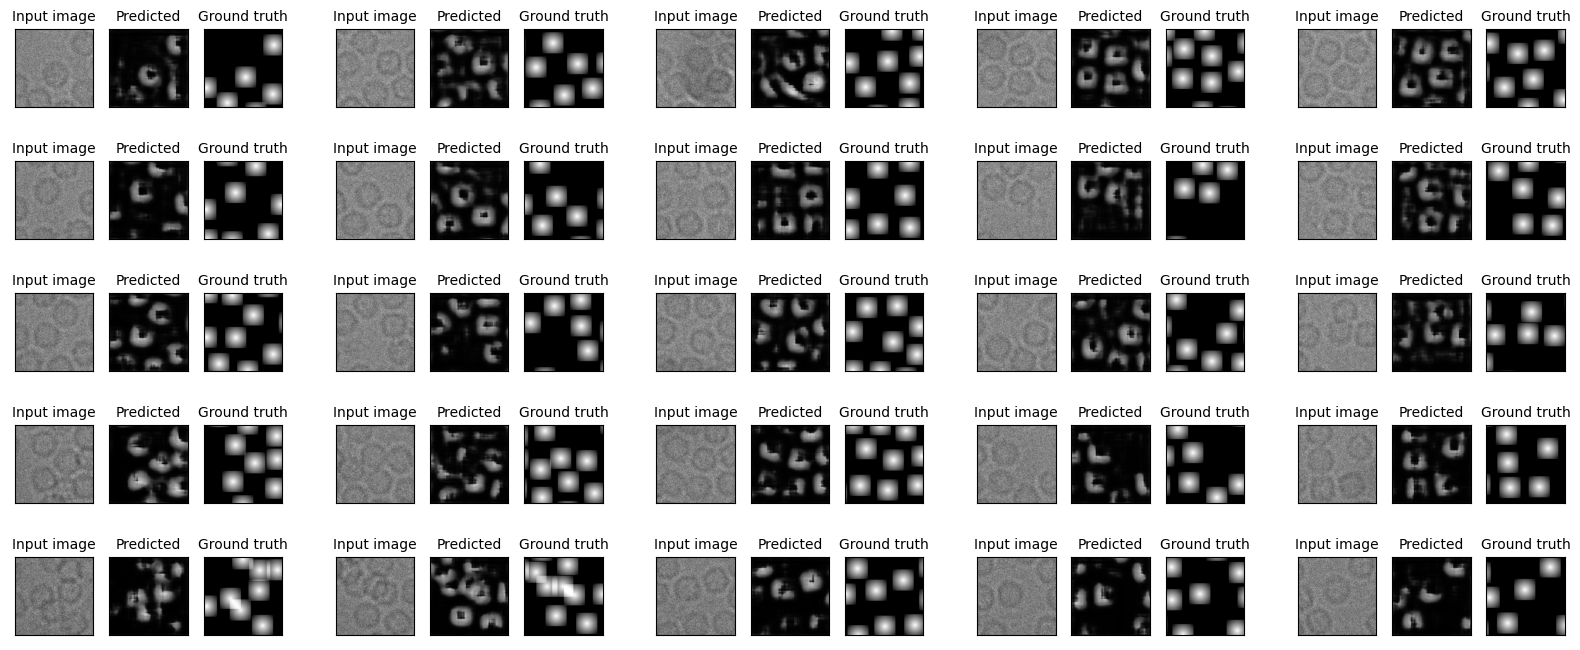

In [2]:
from pathlib import Path
path = Path('May08_03.15.02.bin_avg.png')
model.show_predictions(path)